## Single oscillator, self-coupling

Equations:

$$
\begin{eqnarray*}
    \dot{z} & = & z((\lambda + \mathrm{i}) + b|z|^2) + W \mathrm{Re}(z) \\
    \dot{W} & = & \alpha ( 1 - \mathrm{Re}(z)^2 )
\end{eqnarray*}
$$

In [1]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt

In [12]:
# l = 0.1
l = 3.0
# b = -0.1 + 0.1j
b = -0.1 + 0.2j

alpha = 0.1

In [13]:
def deriv( t, y ):
    z = y[0]
    W = y[1]
    
    z_dot = z * ( ( l + 1.j ) + b * z * np.conj( z ) ) + W * np.real( z )
    if t >= 100. and t < 200.:
        z_dot += 100. * np.cos( t )
    if t >= 300. and t < 400.:
        z_dot += 100. * np.cos( t )
    if t >= 500. and t < 600.:
        z_dot += 100. * np.cos( t )
    
    W_dot = alpha * (1. - np.power( np.real( z ), 2. ))
    
    y_dot = np.zeros( (2,), dtype = np.complex )
    y_dot[0] = z_dot
    y_dot[1] = W_dot
    return y_dot

In [14]:
t_span = [0, 5e3]
t_eval = np.arange( t_span[0], t_span[-1], 1e-2 )

In [15]:
z0 = 0.1 + 0.j
W0 = np.random.randn()

y0 = np.zeros( (2,), dtype = np.complex )
y0[0] = z0
y0[1] = W0

In [16]:
sol = scipy.integrate.solve_ivp( deriv, t_span, y0,
                                 t_eval = t_eval )

In [17]:
t_star = sol.t
y_star = sol.y

z_star = y_star[0, :]
W_star = y_star[1, :]

(0, 1300)

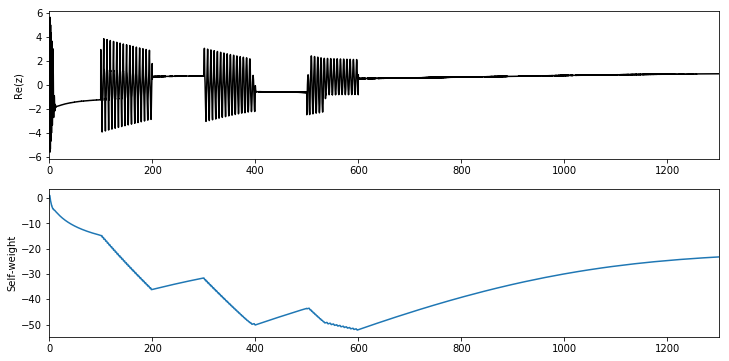

In [21]:
fig, axs = plt.subplots( 2, 1, figsize = (12, 6) )
axs[0].plot( t_star, np.real( z_star ), 'k-' )
axs[0].set_ylabel( 'Re(z)' )
axs[0].set_xlim( 0, 1300 )
# axs[0].set_ylim( 0.8, 1 )
axs[1].plot( t_star, np.real( W_star ) )
axs[1].set_ylabel( 'Self-weight' )
axs[1].set_xlim( 0, 1300 )
# axs[1].set_ylim( -44.8, -44.6 )

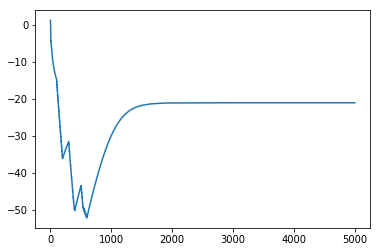

In [19]:
plt.plot( t_star, np.real( W_star ) )
# plt.xlim( 0, 100 )
# plt.ylim( 2.2, 2.3 )